In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import networkx as nx

In [12]:
data_GM = pd.read_csv(r'../../data/EC-003-NET.edgeList_TSS_GM12878.tsv',sep='\t',header=None,engine='python')
data_K = pd.read_csv(r'../../data/EC-003-NET.edgeList_TSS_K562.tsv',sep='\t',header=None,engine='python')

In [13]:
common_tf = pd.DataFrame(list(set(data_GM[1].unique()) & set(data_K[1].unique())))
common_tf

,0
0,PML
1,JUNB
2,USF1
3,EGR1
4,ELK1
...,...
64,MAFK
65,TBP
66,SMAD5
67,EZH2


In [14]:
common_tf['gm_edge'] = 0
common_tf['k_edge'] = 0
common_tf['pos'] = 0
loss = []
gain = []

for i in range(69):
    tf = common_tf.iloc[i,0]
    tem_gm = data_GM[data_GM[1] == tf]
    tem_k = data_K[data_K[1] == tf]    
    common_tf.iloc[i,1] = tem_gm.shape[0]
    common_tf.iloc[i,2] = tem_k.shape[0]
    if tem_gm.shape[0] - tem_k.shape[0] > 0:
        common_tf.iloc[i,3] = -1
        loss.append(tf)
    elif tem_gm.shape[0] - tem_k.shape[0] <= 0:
        common_tf.iloc[i,3] = 1
        gain.append(tf)
    else:
        common_tf.iloc[i,3] = 0

## Network Change

In [15]:
emb_test = pd.read_csv(r'./emb/renamed_genes.csv', index_col=0, header=0)
emb_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,type
THAP3,0.227845,0.0,0.229119,0.0,0.0,0.0,0.492943,0.344457,0.456703,0.0,0.473829,0.317579,0.0,0.0,0.0,0.0,0
DENND2C,0.243005,0.0,0.268365,0.0,0.0,0.0,0.480397,0.347452,0.452888,0.0,0.467448,0.306284,0.0,0.0,0.0,0.0,0
PDE6D,0.309394,0.0,0.320118,0.0,0.0,0.0,0.405799,0.294407,0.380913,0.0,0.401066,0.494472,0.0,0.0,0.0,0.0,0
BSPRY,0.277210,0.0,0.246413,0.0,0.0,0.0,0.480456,0.350336,0.449697,0.0,0.464917,0.300811,0.0,0.0,0.0,0.0,0
PBLD,0.403510,0.0,0.418073,0.0,0.0,0.0,0.426621,0.302868,0.403818,0.0,0.415866,0.229450,0.0,0.0,0.0,0.0,0


In [16]:
gene_list = ['SDF4', 'EEF1A1P9', 'B3GALT6', 'SSU72', 'AL645728.1', 'CDK11A', 'NEDD8', 'UBC', 'VASP']
all_gene_list = []
for name in gene_list:
    all_gene_list.append(name)
    all_gene_list.append(name + '_2')

In [17]:
# emb_test = emb_test[emb_test['type'] != 0]
# emb_test

emb_test = emb_test[emb_test.index.isin(all_gene_list)]
emb_test.sort_index()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,type
AL645728.1,0.327629,0.000000,0.239791,0.000000,0.0,0.0,0.477606,0.339812,0.441159,0.0,0.453028,0.302860,0.0,0.0,0.0,0.0,0
AL645728.1_2,0.321872,0.000000,0.235578,0.000000,0.0,0.0,0.474921,0.328651,0.446786,0.0,0.468181,0.297538,0.0,0.0,0.0,0.0,0
B3GALT6,0.297878,0.000000,0.218328,0.000000,0.0,0.0,0.479128,0.339411,0.454128,0.0,0.468902,0.304527,0.0,0.0,0.0,0.0,0
B3GALT6_2,0.294835,0.000000,0.216097,0.000000,0.0,0.0,0.485786,0.326062,0.453680,0.0,0.476857,0.301416,0.0,0.0,0.0,0.0,0
CDK11A,0.353096,0.000000,0.330184,0.000000,0.0,0.0,0.431733,0.305070,0.407744,0.0,0.428927,0.369603,0.0,0.0,0.0,0.0,0
CDK11A_2,0.283447,0.000000,0.292822,0.000000,0.0,0.0,0.442403,0.325176,0.412874,0.0,0.430324,0.420486,0.0,0.0,0.0,0.0,0
EEF1A1P9,0.291606,0.000000,0.502775,0.000000,0.0,0.0,0.352129,0.296728,0.236954,0.0,0.207478,0.592408,0.0,0.0,0.0,0.0,0
EEF1A1P9_2,0.290232,0.000000,0.500406,0.000000,0.0,0.0,0.336971,0.277988,0.207981,0.0,0.192632,0.627829,0.0,0.0,0.0,0.0,0
NEDD8,0.000000,0.008720,0.000000,0.071429,0.0,0.0,0.492158,0.347902,0.377511,0.0,0.410809,0.565940,0.0,0.0,0.0,0.0,0
NEDD8_2,0.000000,0.000000,0.037777,0.056396,0.0,0.0,0.486112,0.341505,0.381974,0.0,0.426261,0.561123,0.0,0.0,0.0,0.0,0


In [18]:
emb_test['tf_name'] = emb_test.apply(lambda row: row.name[:-2] if row.type == 1 else row.name[:-3] , axis=1)
emb_test_type1 = emb_test[emb_test['type'] == 1]
emb_test_type1 = emb_test_type1.drop(columns='type')
emb_test_type2 = emb_test[emb_test['type'] == 2]
emb_test_type2 = emb_test_type2.drop(columns='type')

emb_test_pro = pd.merge(emb_test_type1,emb_test_type2,on='tf_name')
emb_test_pro.set_index('tf_name')

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13_y,14_y,15_y
tf_name,,,,,,,,,,,,,,,,,,,,,


In [9]:
TF_name = []
math_change = []
abs_change = []
euclidean_change = []
for i in range(emb_test_pro.shape[0]):
    data = emb_test_pro.iloc[i,]
    data = np.array(data)
    TF_name.append(data[18])
    data_k = data[:19]
    data_gm = data[19:]
    math_change.append(sum(data_k - data_gm))
    abs_change.append(sum(abs(data_k - data_gm)))
    euclidean_change.append(sum((data_k - data_gm)**2))

In [16]:
emb_change = pd.DataFrame({'TF_name':TF_name,'math_change':math_change,'abs_change':abs_change,'euclidean_change':euclidean_change})
emb_change.set_index('TF_name')

emb_change = emb_change.sort_values(by = 'abs_change', ascending = True)
emb_change

,TF_name,math_change,abs_change,euclidean_change


In [19]:
emb_change_pos = pd.merge(emb_change,common_tf,left_on='TF_name',right_on=0)
emb_change_pos

,TF_name,math_change,abs_change,euclidean_change,0,gm_edge,k_edge,pos


In [18]:
for i in range(69):
    emb_change_pos.iloc[i,3] = emb_change_pos.iloc[i,3] * emb_change_pos.iloc[i,7]
emb_change_pos

IndexError: single positional indexer is out-of-bounds

In [12]:
emb_change = emb_change_pos.sort_values(by = 'abs_change', ascending = True)
# emb_change.loc['new'] = ['test','1','1',0.43,'0','0','0','0']
emb_change

,TF_name,math_change,abs_change,euclidean_change,0,gm_edge,k_edge,pos
0,POLR2A,-0.042411,0.220744,0.003851,POLR2A,10628,10946,1
1,STAT5A,-0.011388,0.359766,-0.010863,STAT5A,2744,2534,-1
2,RFX5,-0.016481,0.390403,-0.012410,RFX5,3251,1290,-1
3,SUZ12,-0.013024,0.425201,-0.012942,SUZ12,4120,1869,-1
4,POLR3G,0.001020,0.430509,-0.019082,POLR3G,61,47,-1
...,...,...,...,...,...,...,...,...
64,SMC3,0.097715,1.522470,-0.163709,SMC3,5810,5119,-1
65,ZBTB33,0.088073,1.526080,0.140606,ZBTB33,1816,8049,1
66,YBX1,0.134396,1.721396,-0.192267,YBX1,765,195,-1
67,IKZF1,0.055887,1.933759,-0.235258,IKZF1,10396,9842,-1


In [13]:
# import seaborn as sns
# %matplotlib inline

# n = np.array(emb_change['euclidean_change']).reshape(1,-1)
# name = np.array(emb_change['TF_name']).reshape(1,-1)
# sns.set(font_scale=1.5)

# sns.set_context({"figure.figsize":(24,4)})
# p1 = sns.heatmap(n,cmap="RdBu_r",xticklabels = True, cbar=True, cbar_kws={"orientation":"horizontal"})

# s1 = p1.get_figure()
# s1.savefig(r'C:\Users\学汪\Desktop\graph embedding\figure\map_2.png',dpi=200,bbox_inches='tight')

In [14]:
emb_change.set_index('TF_name')

,math_change,abs_change,euclidean_change,0,gm_edge,k_edge,pos
TF_name,,,,,,,
POLR2A,-0.042411,0.220744,0.003851,POLR2A,10628,10946,1
STAT5A,-0.011388,0.359766,-0.010863,STAT5A,2744,2534,-1
RFX5,-0.016481,0.390403,-0.012410,RFX5,3251,1290,-1
SUZ12,-0.013024,0.425201,-0.012942,SUZ12,4120,1869,-1
POLR3G,0.001020,0.430509,-0.019082,POLR3G,61,47,-1
...,...,...,...,...,...,...,...
SMC3,0.097715,1.522470,-0.163709,SMC3,5810,5119,-1
ZBTB33,0.088073,1.526080,0.140606,ZBTB33,1816,8049,1
YBX1,0.134396,1.721396,-0.192267,YBX1,765,195,-1


In [15]:
sorted_emb_change = emb_change.sort_values(by='pos')
neg_sorted = sorted_emb_change[:36]
pos_sorted = sorted_emb_change[36:]




In [16]:
def calculate_transposed_abs_change(df):
    n = df[['abs_change','TF_name']].set_index('TF_name')
    df_T = pd.DataFrame(n.values.T, index=n.columns, columns=n.index)
    return df_T.sort_values(axis=1, by='abs_change')


calculate_transposed_abs_change(neg_sorted).to_csv('./result/compare_network_change/1e-4_neg.csv', index=True)
calculate_transposed_abs_change(pos_sorted).to_csv('./result/compare_network_change/1e-4_pos.csv', index=True)
calculate_transposed_abs_change(neg_sorted)

# n = emb_change[['abs_change','TF_name']].set_index('TF_name')
# df2 = pd.DataFrame(n.values.T, index=n.columns, columns=n.index)
# df2

TF_name,STAT5A,RFX5,SUZ12,POLR3G,MEF2A,ELF1,ELK1,BCLAF1,CHD2,SIX5,...,SIN3A,SP1,MLLT1,YY1,MTA2,TARDBP,NR2C2,SMC3,YBX1,IKZF1
abs_change,0.359766,0.390403,0.425201,0.430509,0.43944,0.441915,0.443915,0.453858,0.454137,0.456202,...,1.093523,1.127593,1.152907,1.215263,1.32724,1.365651,1.444883,1.52247,1.721396,1.933759


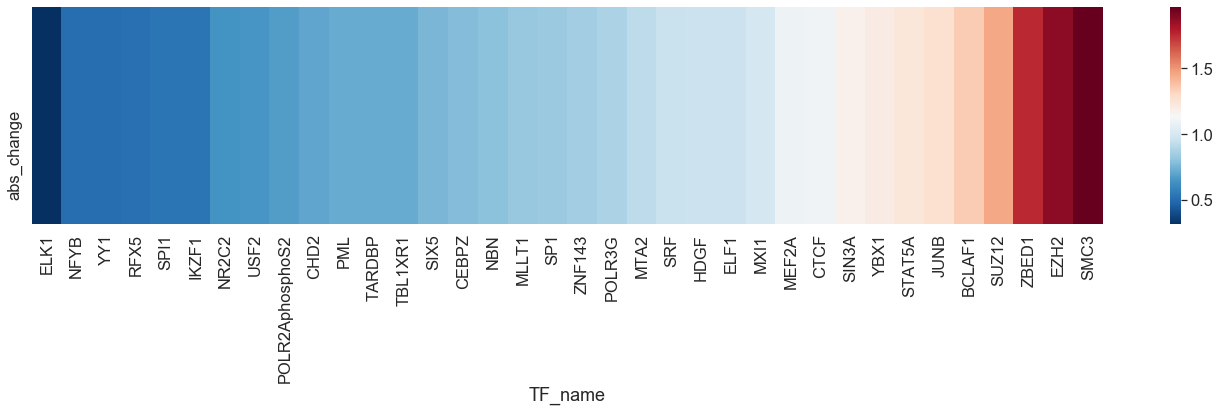

In [38]:
import seaborn as sns
%matplotlib inline

# n = emb_change[['abs_change','TF_name']].set_index('TF_name')
# name = emb_change['TF_name']
sns.set(font_scale=1.5)

sns.set_context({"figure.figsize":(24,4)})
p1 = sns.heatmap(calculate_transposed_abs_change(neg_sorted),cmap="RdBu_r",cbar=True, xticklabels = True,  
#                  cbar_kws={"orientation":"horizontal"}
                )

s1 = p1.get_figure()
s1.savefig(r'C:\Users\学汪\Desktop\graph embedding\figure\map_neg.png',dpi=200,bbox_inches='tight')





# sns.set(font_scale=1.5)

# sns.set_context({"figure.figsize":(24,4)})
# p1 = sns.heatmap(calculate_transposed_abs_change(pos_sorted),cmap="RdBu_r",cbar=True, xticklabels = True,  
# #                  cbar_kws={"orientation":"horizontal"}
#                 )

# s1 = p1.get_figure()
# s1.savefig(r'C:\Users\学汪\Desktop\graph embedding\figure\map_pos.png',dpi=200,bbox_inches='tight')

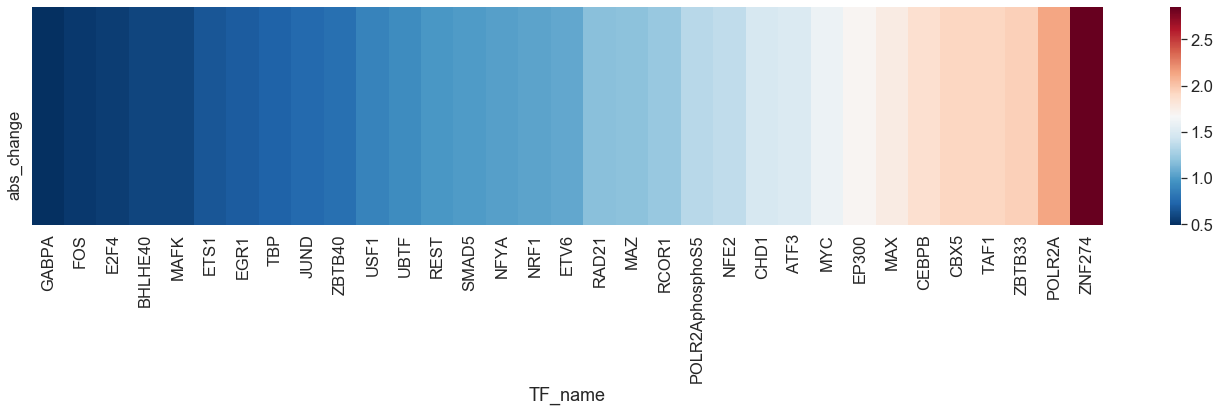

In [227]:
sns.set(font_scale=1.5)

sns.set_context({"figure.figsize":(24,4)})
p1 = sns.heatmap(calculate_transposed_abs_change(pos_sorted),cmap="RdBu_r",cbar=True, xticklabels = True,  
#                  cbar_kws={"orientation":"horizontal"}
                )

s1 = p1.get_figure()
s1.savefig(r'C:\Users\学汪\Desktop\graph embedding\figure\map_pos.png',dpi=200,bbox_inches='tight')

In [150]:
loss_frame = pd.DataFrame(index=('TF_name', 'abs_change'))
loss_frame

""
TF_name
abs_change


In [160]:
emb_change[0]

0       ELK1
1      GABPA
2       NFYB
3        YY1
4       RFX5
       ...  
64      TAF1
65    ZBTB33
66      SMC3
67    POLR2A
68    ZNF274
Name: 0, Length: 69, dtype: object

In [161]:
for tf in emb_change[0]:
    print(tf)

ELK1
GABPA
NFYB
YY1
RFX5
SPI1
IKZF1
FOS
E2F4
BHLHE40
MAFK
NR2C2
USF2
ETS1
POLR2AphosphoS2
EGR1
CHD2
TBP
PML
TARDBP
TBL1XR1
JUND
SIX5
CEBPZ
ZBTB40
NBN
MLLT1
SP1
ZNF143
POLR3G
USF1
MTA2
UBTF
SRF
HDGF
ELF1
REST
MXI1
SMAD5
NFYA
NRF1
ETV6
MEF2A
CTCF
RAD21
SIN3A
MAZ
YBX1
RCOR1
STAT5A
JUNB
POLR2AphosphoS5
BCLAF1
NFE2
SUZ12
CHD1
ATF3
MYC
EP300
ZBED1
MAX
CEBPB
EZH2
CBX5
TAF1
ZBTB33
SMC3
POLR2A
ZNF274


,abs_change
TF_name,
ELK1,0.315795
GABPA,0.498763
NFYB,0.511020
YY1,0.515424
RFX5,0.518236
...,...
TAF1,1.930356
ZBTB33,1.956010
SMC3,1.967100


In [167]:
df2 = pd.DataFrame(n.values.T, index=n.columns, columns=n.index)
df2

TF_name,ELK1,GABPA,NFYB,YY1,RFX5,SPI1,IKZF1,FOS,E2F4,BHLHE40,...,ZBED1,MAX,CEBPB,EZH2,CBX5,TAF1,ZBTB33,SMC3,POLR2A,ZNF274
abs_change,0.315795,0.498763,0.51102,0.515424,0.518236,0.535457,0.541132,0.543829,0.556197,0.596801,...,1.7651,1.768334,1.858618,1.882285,1.928545,1.930356,1.95601,1.9671,2.141943,2.849939


In [80]:
n.shape

(69, 1)

## TF neighbor

In [18]:
emb = pd.read_csv(r'C:\Users\学汪\Desktop\graph embedding\64_relu_30_5_adjacentTF_1e-4.csv', index_col=0)

k_emb = emb[emb['type'] == 1].copy(deep=True)
gm_emb = emb[emb['type'] == 2].copy(deep=True)
# gene_emb = emb[emb['type'] == 0].copy(deep=True)

emb.drop('type' , axis='columns', inplace=True)
k_emb.drop('type', axis='columns', inplace=True)
gm_emb.drop('type', axis='columns', inplace=True)
# gene_emb.drop('type', axis='columns', inplace=True)

print(f'K562: {k_emb.shape}')
print(f'GM12878: {gm_emb.shape}')
# print(f'Gene: {gene_emb.shape}')
emb.dtypes

K562: (69, 64)
GM12878: (69, 64)


0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
59    float64
60    float64
61    float64
62    float64
63    float64
Length: 64, dtype: object

In [19]:
tf_emb = pd.concat([gm_emb, k_emb])
all_embeddings = tf_emb.to_numpy()
nodes = tf_emb.index.to_numpy()

In [20]:
trans = TSNE(n_components=2, random_state=0)
emb_transformed = pd.DataFrame(trans.fit_transform(all_embeddings), index=nodes)
emb_transformed['type'] = emb_transformed.index.map(lambda name: 1 if name[-2:] == '_k' else 2)

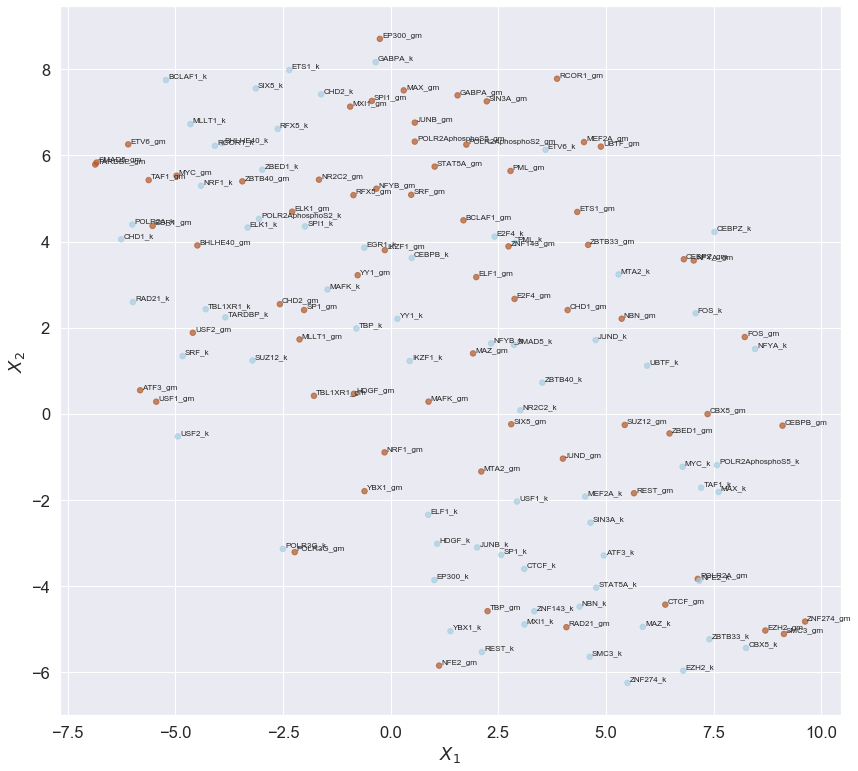

In [22]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(14, 14))
ax.scatter(
    emb_transformed[0],
    emb_transformed[1],
    c=emb_transformed["type"],
    cmap="Paired",
    alpha=alpha,
    s=30
)


# mark out some nodes
target_nodes = ['PML', 'NBN', 'MAZ', 'RFX5', 'YBX1', 'MAFK',  'JUND', 'MYC', 'MAX']
target_txts = []
for n in target_nodes:
    target_txts.append(n + '_k')
    target_txts.append(n + '_gm')

TARGETS_ONLY = False
for i, txt in enumerate(nodes):
    if txt in target_txts or not TARGETS_ONLY:
        ax.text(emb_transformed.iloc[i][0]+.05, emb_transformed.iloc[i][1]+.05,txt,fontsize=8)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.savefig(r'C:\Users\学汪\Desktop\graph embedding\figure\_TF.png', dpi=150)
plt.show()